# 🐍 NYC High School Directory Exploration

Objective: Explore the dataset using pandas: clean data, perform basic analysis, create visualizations, and summarize insights.


# 2. load & clean data

In [31]:
import os
os.chdir("/Users/oleksandraprotsenko/DOC/DA_projects/DAY_2")

df = pd.read_csv("high-school-directory.csv")

In [30]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace(r"[^\w\s]", "", regex=True)
)

print(df.shape)
df.head()

(435, 69)


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


# 3. Filter brooklyn schools

In [31]:
brooklyn = df[df["borough"] == "Brooklyn"].copy()
brooklyn.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


# 4. q1 — total schools in brooklyn

In [33]:
total_bk_schools = brooklyn["dbn"].nunique()
print("Total unique schools in Brooklyn:", total_bk_schools)

Total unique schools in Brooklyn: 121


# 5. q2 — schools in brooklyn with grade 9 entry

In [16]:
brooklyn = df[df["borough"] == "Brooklyn"]

bk_grade9 = brooklyn[brooklyn["grade_span_min"] <= 9]
bk_grade9_count = bk_grade9["dbn"].nunique()

print("Schools in Brooklyn that offer grade 9 entry:", bk_grade9_count)



Schools in Brooklyn that offer grade 9 entry: 121


# 6. group & summarize

In [35]:
schools_per_borough = df.groupby("borough")["dbn"].nunique()
schools_per_borough

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

### average students per borough

In [38]:
avg_students = df.groupby("borough")["total_students"].mean().round(0).astype(int)
print(avg_students)


borough
Bronx             490
Brooklyn          699
Manhattan         590
Queens           1047
Staten Island    1848
Name: total_students, dtype: int64


### summary stats of grade_span_max per borough

In [44]:
grade_summary = df.groupby("borough")["grade_span_max"].describe().round(2)
display(grade_summary)

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.91,0.37,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.93,0.38,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.88,0.47,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.82,0.50,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.00,0.00,12.0,12.0,12.0,12.0,12.0


### Summary of grade_span_max per Borough
- Most schools in all boroughs end at grade 12.  
- Bronx, Brooklyn, and Manhattan also have schools ending at grade 9.  
- Queens has a minimum grade span max of 10.  
- Staten Island is consistent, all schools end at grade 12. 

# 7. visualization

### bar chart: schools per borough

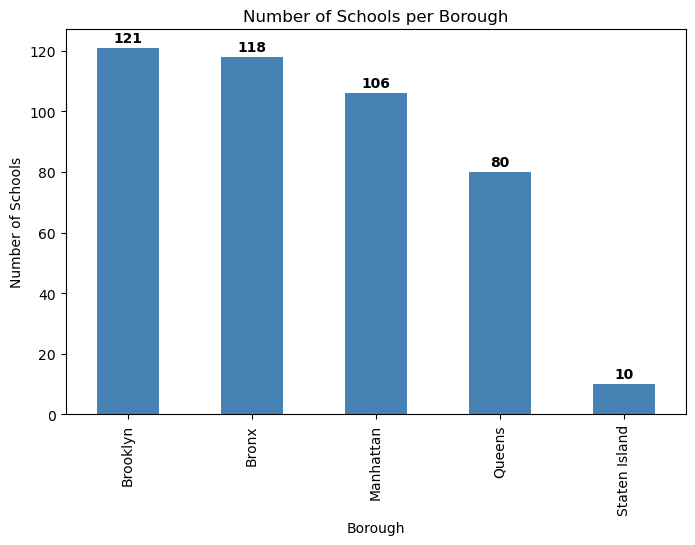

In [41]:
# sort values by descending order
schools_per_borough_sorted = schools_per_borough.sort_values(ascending=False)

# plot bar chart
ax = schools_per_borough_sorted.plot(
    kind="bar",
    figsize=(8, 5),
    title="Number of Schools per Borough",
    color="steelblue"
)

# labels
plt.xlabel("Borough")
plt.ylabel("Number of Schools")

# add value labels on bars
for i, v in enumerate(schools_per_borough_sorted):
    ax.text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.show()


# 8. key insights

## 🔑 Key Insights

1. Brooklyn has the largest number of unique schools among all boroughs.  
2. A significant portion of schools in Brooklyn offer entry at grade 9 or earlier.  
3. The average student enrollment differs by borough, Manhattan tends to have larger schools compared to Staten Island.  

### 9. save clean dataset

In [43]:
df.to_csv("high-school-directory_clean.csv", index=False)